<a href="https://colab.research.google.com/github/Octa-p/DWDM21/blob/main/Chap_8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-means**

### **Generate Data**

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

In [3]:
X.shape

(500, 2)

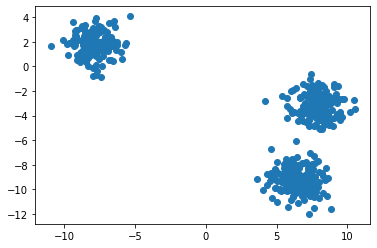

In [7]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

### **Clustering**

**import**

In [8]:
from sklearn.cluster import KMeans

**Define**

In [9]:
kmeans = KMeans(n_clusters=2, random_state=6)

**Fit-Predict**

In [11]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [12]:
y_clust = kmeans.fit_predict(X)

In [14]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

**Plot**

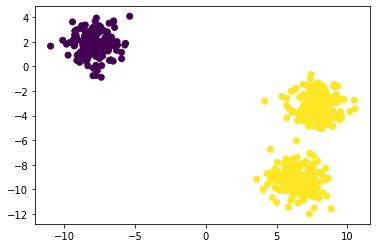

In [15]:
plt.scatter(X[:,0],X[:,1], c=y_clust)

**3 Cluster**

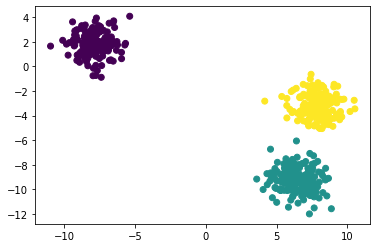

In [17]:
#Define
kmeans = KMeans(n_clusters=3, random_state=6)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

**4 Cluster**

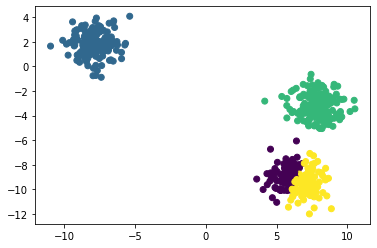

In [18]:
#Define
kmeans = KMeans(n_clusters=4, random_state=6)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

**5 Cluster**

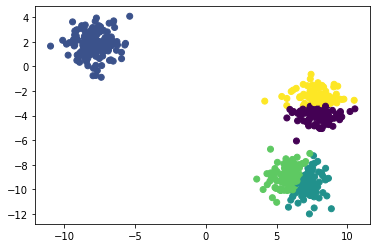

In [33]:
#Define
kmeans = KMeans(n_clusters=5, random_state=14)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

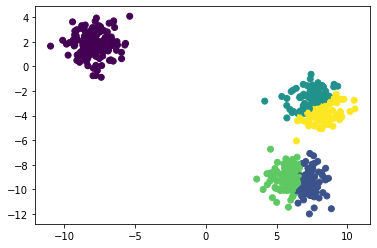

In [26]:
#Define
kmeans = KMeans(n_clusters=5, random_state=6)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

## **Example Application (Color Quantization)**

In [35]:
import cv2
import os

In [36]:
img = cv2.imread('/content/istockphoto-455663609-612x612.jpg')

In [37]:
img.shape

(612, 564, 3)

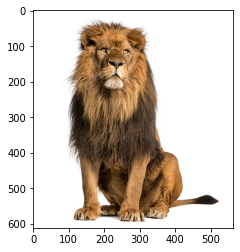

In [38]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### นับจำนวนสี

In [39]:
import numpy as np

In [40]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape #มี 43,285 สี

(43285, 3)

### จัดกลุ่มสีให้เหลือ 16 สี

In [41]:
myquantize = KMeans(n_clusters=16, random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [42]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(345168, 3)

In [43]:
final_color = myquantize.fit_predict(img_row)

ใช้ centroid เป็นตัวแทนของสี

In [45]:
centroid = myquantize.cluster_centers_

In [46]:
centroid

array([[214.39336898, 157.13475936, 100.70096257],
       [254.81114123, 254.79640473, 254.73065507],
       [ 92.88098562,  67.35508865,  44.13311462],
       [ 26.89255109,  13.54372665,   4.70479016],
       [147.61735068, 100.4290033 ,  54.26951264],
       [215.03309693, 196.01270686, 177.01536643],
       [ 74.61960651,  50.45108548,  28.16668928],
       [192.14632479, 138.1325641 ,  85.07777778],
       [121.74365367,  78.55179057,  36.67724388],
       [233.72689491, 181.82584603, 128.68236691],
       [115.56499116,  89.30031416,  65.22648734],
       [147.53794736, 116.8633895 ,  87.67678596],
       [235.77403344, 227.42032393, 218.0545977 ],
       [174.56704578, 119.89821275,  66.19564179],
       [176.0125448 , 154.07287933, 133.71027479],
       [ 51.79743789,  32.93284161,  16.04340062]])

แทนสีคืนลงไป

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range